In [2]:
from src.clustering.run import run_clusters, load_config, get_cluster
from src.reachability_analysis.labeling_oracle import LabelingOracleSINDData
from src.clustering.Labels import run_labels, plot_dual_pca_3d, plot_dual_tsne_3d
import os

Create Clusters

In [4]:
config = load_config(folder='experiments', model_file='SINDDataset_pretrained_2024-04-27_00-11-45_KIP', index=2, index_data=0)

run_clusters(config=config, load_embeddings=False, load_clusters=False, show_clusters=False)

2024-04-29 02:53:19,201 | INFO : Running:
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/ipykernel_launcher.py --f=/home/kfragkedaki/.local/share/jupyter/runtime/kernel-v2-573797RULYANu2bNkZ.json

2024-04-29 02:53:19,202 | INFO : Using device: cpu
2024-04-29 02:53:19,203 | INFO : Loading and preprocessing data ...
2024-04-29 02:53:19,205 | INFO : Loading 23 datasets files using 20 parallel processes ...
2024-04-29 02:53:19,888 | INFO : 10412 samples may be used for evaluation
2024-04-29 02:53:19,889 | INFO : 0 samples may be used for training
2024-04-29 02:53:19,890 | INFO : 10412 samples will be used for validation
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer was not TransformerEncoderLayer
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because

Loaded model from /home/kfragkedaki/projects/Pedestrian_Project/experiments/SINDDataset_pretrained_2024-04-27_00-11-45_KIP/checkpoints/model_best.pth. Epoch: 28
Evaluating   0.0% | batch:         0 of        41	|	loss: 0.114341
Evaluating   2.4% | batch:         1 of        41	|	loss: 0.113434
Evaluating   4.9% | batch:         2 of        41	|	loss: 0.140235
Evaluating   7.3% | batch:         3 of        41	|	loss: 0.145652
Evaluating   9.8% | batch:         4 of        41	|	loss: 0.139883
Evaluating  12.2% | batch:         5 of        41	|	loss: 0.131068
Evaluating  14.6% | batch:         6 of        41	|	loss: 0.116511
Evaluating  17.1% | batch:         7 of        41	|	loss: 0.0856757
Evaluating  19.5% | batch:         8 of        41	|	loss: 0.132968
Evaluating  22.0% | batch:         9 of        41	|	loss: 0.130953
Evaluating  24.4% | batch:        10 of        41	|	loss: 0.130175
Evaluating  26.8% | batch:        11 of        41	|	loss: 0.129993
Evaluating  29.3% | batch:        

2024-04-29 02:53:42,402 | INFO : Evaluation Summary: loss: 0.130040 | 
2024-04-29 02:53:42,452 | INFO : Evaluation runtime: 0.0 hours, 0.0 minutes, 6.195145130157471 seconds



Cluster assignments: 59
Silhouette Score: 0.5596529245376587, num_clusters: 58
Load data from: /home/kfragkedaki/projects/Pedestrian_Project/experiments/SINDDataset_pretrained_2024-04-27_00-11-45_KIP/eval10/clusters


In [5]:
clusters1, embeddings, target, padding_masks = run_clusters(config=config, load_embeddings=True, load_clusters=True, show_clusters=False)

In [6]:
config_original = config.copy()
config_original["original_data"] = True
run_clusters(config=config, load_embeddings=True, load_clusters=False, show_clusters=False)
clusters2, embeddings, target, padding_masks = run_clusters(config=config, load_embeddings=True, load_clusters=True, show_clusters=False)

Cluster assignments: 59
Silhouette Score: 0.5596529245376587, num_clusters: 58
Load data from: /home/kfragkedaki/projects/Pedestrian_Project/experiments/SINDDataset_pretrained_2024-04-27_00-11-45_KIP/eval10/clusters


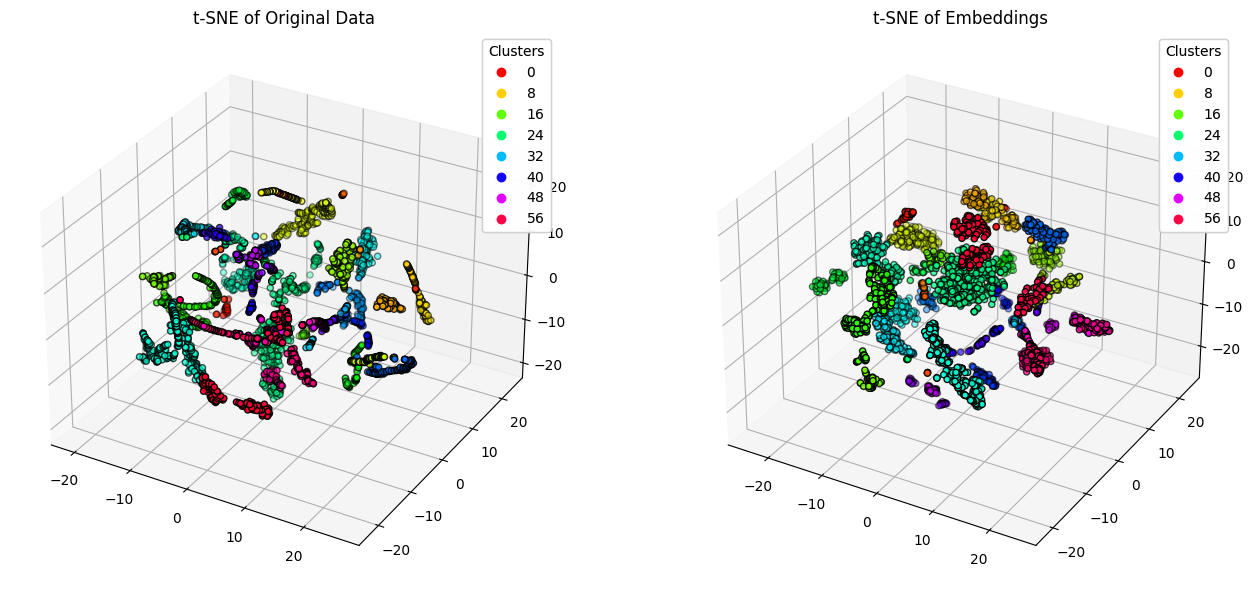

In [7]:
plot_dual_tsne_3d((target[clusters2!=-1], clusters2[clusters2!=-1]), (embeddings[clusters1!=-1], clusters1[clusters1!=-1]))

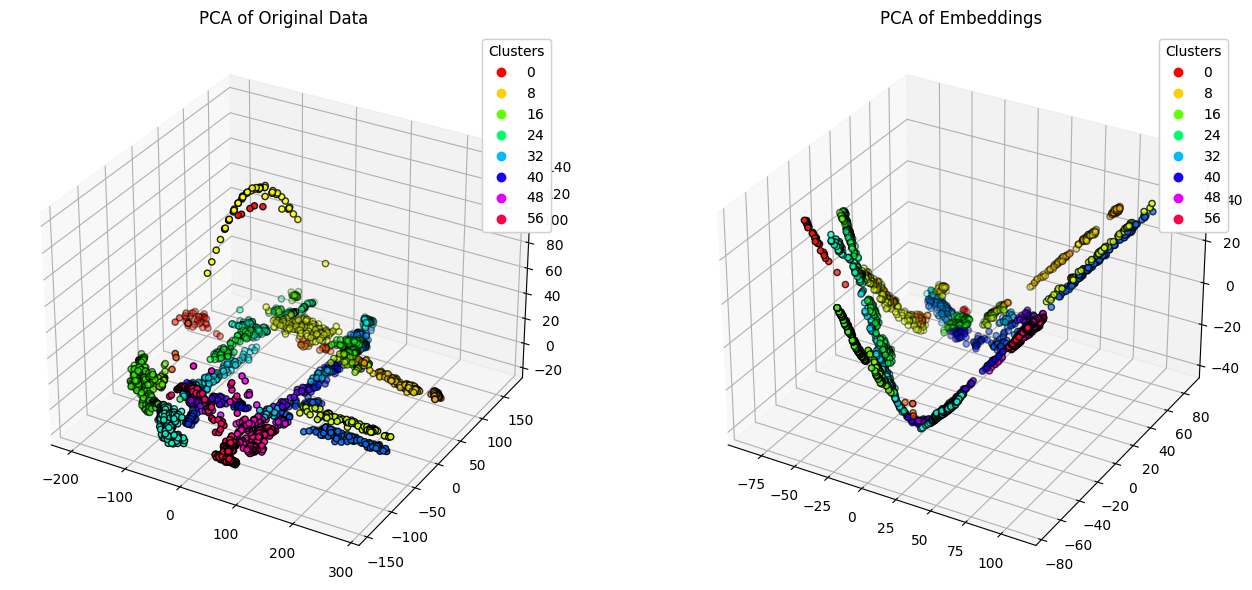

In [8]:
plot_dual_pca_3d((target[clusters2!=-1], clusters2[clusters2!=-1]), (embeddings[clusters1!=-1], clusters1[clusters1!=-1]))

In [ ]:
run_labels(config, remove_noise=True)

Get Cluster ID

In [ ]:
ROOT_RESOURCES = os.getcwd() + "/resources"

In [ ]:
config = load_config(folder='experiments', model_file='SINDDataset_pretrained_2024-04-27_00-11-45_KIP', index=2, index_data=0)
config_test = config.copy()
config_test['data_dir'] = ROOT_RESOURCES + f'/test/{"cross_left_8_6_4"}'
test_labeling_oracle = LabelingOracleSINDData(config_test)

In [ ]:
get_cluster(config_test, data_oracle=test_labeling_oracle)